# ECON 409 and 442 B

## Sebastian Polackal

In [14]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [15]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import io
import datetime
import matplotlib.lines as mlines
from fredapi import Fred
import statsmodels.formula.api as smf
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import os 
import scipy.stats as st

## Q1
Use the A1 JPYUSD.csv in the file posted on the website for the following questions.

In [16]:
df = pd.read_csv("C:/Users/sebpo/Desktop/A1_JPYUSD.csv", parse_dates = True, index_col = 0)
print (df)

               Japan
1985-01-01  0.003927
1985-02-01  0.003854
1985-03-01  0.003960
1985-04-01  0.003964
1985-05-01  0.003971
...              ...
2022-07-01  0.007519
2022-08-01  0.007214
2022-09-01  0.006909
2022-10-01  0.006746
2022-11-01  0.007205

[455 rows x 1 columns]


### Q1.a
Use the first 80% of the data to determine the appropriate hyperparameters for an ARIMA(p,d,q)
for making forecasts of the JPYUSD series.

In [17]:
print (455 * 0.8)

364.0


In [18]:
df80 = df.head(n=364)
df80

,Japan
1985-01-01,0.003927
1985-02-01,0.003854
1985-03-01,0.003960
1985-04-01,0.003964
1985-05-01,0.003971
...,...
2014-12-01,0.008289
2015-01-01,0.008459
2015-02-01,0.008385
2015-03-01,0.008326


In [19]:
df80.isnull().sum()

Japan    0
dtype: int64

In [20]:
import pmdarima as pm
arima = pm.auto_arima(df80, start_p = 0, start_q = 0,
                      suppress_warnings=True)
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  364
Model:               SARIMAX(2, 1, 0)   Log Likelihood                2462.691
Date:                Fri, 27 Jan 2023   AIC                          -4919.383
Time:                        23:03:51   BIC                          -4907.700
Sample:                    01-01-1985   HQIC                         -4914.739
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0900      0.045      2.018      0.044       0.003       0.177
ar.L2          0.0947      0.050      1.898      0.058      -0.003       0.192
sigma2      7.494e-08   4.22e-09     17.775      0.000    6.67e-08    8.32e-08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                39.98
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                            -0.12
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Q1.b
For the last 20% of the data, make a series of out-of-sample one month ahead, forecasts of the
JPYUSD exchange rate along with a 90% confidence interval for each forecast. (Hint: You may
need to use a loop).

In [21]:
df20 = df.tail(91)
df20

,Japan
2015-05-01,0.008081
2015-06-01,0.008167
2015-07-01,0.008066
2015-08-01,0.008251
2015-09-01,0.008337
...,...
2022-07-01,0.007519
2022-08-01,0.007214
2022-09-01,0.006909
2022-10-01,0.006746


In [22]:
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.8)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    test = pd.DataFrame(test)
    test["predictions"] = predictions
    return test
y = evaluate_arima_model(df['Japan'], (2,0,0))

C:\Users\sebpo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sebpo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sebpo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sebpo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sebpo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

In [23]:
y

,Japan,predictions
2015-05-01,0.008081,0.008458
2015-06-01,0.008167,0.008062
2015-07-01,0.008066,0.008190
2015-08-01,0.008251,0.008074
2015-09-01,0.008337,0.008282
...,...,...
2022-07-01,0.007519,0.007306
2022-08-01,0.007214,0.007570
2022-09-01,0.006909,0.007223
2022-10-01,0.006746,0.006923


In [24]:
# fit the model to get the fitted model object
model = ARIMA(df20["Japan"].dropna(), order=(2,0,0)).fit()

# the forecast is made for the next 12 (or however many)
# periods that follow the data used to train the model
model.forecast(12)

C:\Users\sebpo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sebpo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sebpo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2022-12-01    0.007323
2023-01-01    0.007396
2023-02-01    0.007461
2023-03-01    0.007522
2023-04-01    0.007580
2023-05-01    0.007636
2023-06-01    0.007690
2023-07-01    0.007741
2023-08-01    0.007790
2023-09-01    0.007837
2023-10-01    0.007882
2023-11-01    0.007925
Freq: MS, Name: predicted_mean, dtype: float64

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Japan   No. Observations:                   91
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 642.369
Date:                Fri, 27 Jan 2023   AIC                          -1276.739
Time:                        23:04:11   BIC                          -1266.695
Sample:                    05-01-2015   HQIC                         -1272.687
                         - 11-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0089      0.000     18.741      0.000       0.008       0.010
ar.L1          1.0829      0.013     80.387      0.000       1.056       1.109
ar.L2         -0.1208      0.013     -8.998      0.000      -0.147      -0.094
sigma2      4.184e-08   4.47e-09      9.359      0.000    3.31e-08    5.06e-08
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                13.09
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.06
Prob(H) (two-sided):                  0.89   Kurtosis:                         4.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
forecast = model.get_forecast(12)

# get the 90% confidence interval for the forecast
yhat_conf_int = forecast.conf_int(alpha=0.1)
yhat_conf_int["mean"] = forecast.predicted_mean
yhat_conf_int

,lower Japan,upper Japan,mean
2022-12-01,0.006987,0.007660,0.007323
2023-01-01,0.006900,0.007892,0.007396
2023-02-01,0.006852,0.008070,0.007461
2023-03-01,0.006825,0.008219,0.007522
2023-04-01,0.006811,0.008350,0.007580
2023-05-01,0.006807,0.008466,0.007636
2023-06-01,0.006809,0.008571,0.007690
2023-07-01,0.006815,0.008667,0.007741
2023-08-01,0.006825,0.008755,0.007790
2023-09-01,0.006838,0.008836,0.007837


### Q1.c 
Generate a plot of an equity curve showing what your returns for the out-of-sample testing period
would have been if you had gone long when you forecasted the exchange rate to increase and short
when you forecasted the exchange rate would decrease. Hold each position for a single period.

In [27]:
# compute whether we are going long or short
y["Signals"] = np.where(y["predictions"]>y['Japan'].shift(), 1,-1)

# get the series of log returns
y["returns"] = np.log(y["Japan"]/y["Japan"].shift())

# compute the long and short returns
y["strategy returns"] = y["Signals"].shift()*y["returns"] 

# convert to simple returns
y["Cumulative Returns"] = (np.exp(y["strategy returns"].cumsum())-1)*100

In [28]:
y["Cumulative Returns"]

2015-05-01          NaN
2015-06-01    -1.050505
2015-07-01     0.177778
2015-08-01     2.467319
2015-09-01     3.535132
                ...    
2022-07-01    35.483961
2022-08-01    41.198736
2022-09-01    35.218715
2022-10-01    32.026152
2022-11-01    41.005452
Name: Cumulative Returns, Length: 91, dtype: float64

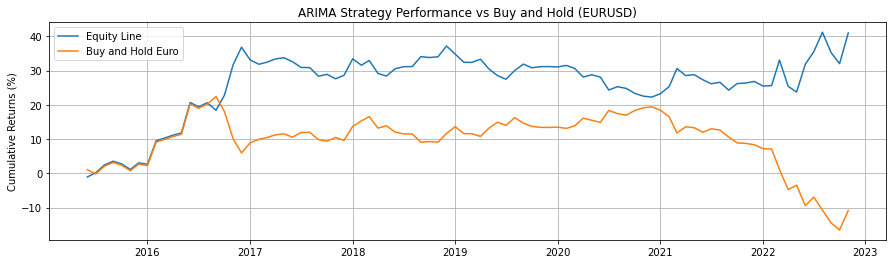

In [29]:
plt.figure(figsize = (15, 4))
plt.plot(y["Cumulative Returns"])
plt.plot((np.exp(y["returns"].cumsum())-1)*100)
plt.ylabel("Cumulative Returns (%)")
plt.title("ARIMA Strategy Performance vs Buy and Hold (EURUSD)")
plt.legend(["Equity Line", "Buy and Hold Euro"])
plt.grid()

### Q1.d
 Compute the continuously compounded and annualized returns of the trading strategy.

In [30]:
# compounded
P = 1000000
A = (((y["Cumulative Returns"]/100)+1)*P)[-1]
t = (len(y)/12)
CCROR = np.log(A/P)/t
print(CCROR*100)

4.531363125137081


In [31]:
# Annualized 
((A/P)**(1/t)-1)*100

4.635597838680372

# Q2. 
Use the 1-year-treasury-rate-yield-chart.csv in the file posted on the website for the following questions.
The following questions are based on the forecasts and returns generated in question (1).

In [34]:
data = pd.read_csv("C:/Users/sebpo/Desktop/1-year-treasury-rate-yield-chart.csv", parse_dates = True, index_col = 0)
print (data)

             value
date              
1962-01-02    3.22
1962-01-03    3.24
1962-01-04    3.24
1962-01-05    3.26
1962-01-08    3.31
...            ...
2023-01-08     NaN
2023-01-09     NaN
2023-01-10     NaN
2023-01-11     NaN
2023-01-12     NaN

[15270 rows x 1 columns]


In [35]:
y['s_current'] = y['Japan']
y['s_future'] = y['s_current'].shift(+1)
y['s_change'] = y['s_future'] - y['s_current']
y['s_change_fitted'] = y['predictions'] - y['predictions'].shift()
y['error'] = ((y['Japan'].shift(-1) - y['Japan']) - (y['predictions'].shift(-1)-y['Japan']))
y

,Japan,predictions,Signals,returns,strategy returns,Cumulative Returns,s_current,s_future,s_change,s_change_fitted,error
2015-05-01,0.008081,0.008458,-1,NaN,NaN,NaN,0.008081,NaN,NaN,NaN,0.000104
2015-06-01,0.008167,0.008062,-1,0.010561,-0.010561,-1.050505,0.008167,0.008081,-0.000086,-0.000396,-0.000123
2015-07-01,0.008066,0.008190,1,-0.012337,0.012337,0.177778,0.008066,0.008167,0.000100,0.000128,0.000177
2015-08-01,0.008251,0.008074,1,0.022598,0.022598,2.467319,0.008251,0.008066,-0.000184,-0.000116,0.000055
2015-09-01,0.008337,0.008282,1,0.010367,0.010367,3.535132,0.008337,0.008251,-0.000086,0.000208,-0.000083
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,0.007519,0.007306,-1,0.026927,0.026927,35.483961,0.007519,0.007319,-0.000200,-0.000530,-0.000356
2022-08-01,0.007214,0.007570,1,-0.041315,0.041315,41.198736,0.007214,0.007519,0.000304,0.000264,-0.000315
2022-09-01,0.006909,0.007223,1,-0.043275,-0.043275,35.218715,0.006909,0.007214,0.000306,-0.000347,-0.000177
2022-10-01,0.006746,0.006923,1,-0.023894,-0.023894,32.026152,0.006746,0.006909,0.000163,-0.000300,0.000428


In [36]:
P = len(y['error'])
MSE_T = np.sum(np.square(y['error']))/P
MSE_T

4.18138193690977e-08

In [38]:
MSE_R = np.sum(np.square(y['s_change']))/P
MSE_R

4.2298705334510525e-08

## Q2.a
Perform The DMW test on your forecasts. Were you able to outperform the random walk?

In [40]:
import scipy.stats as st

In [41]:
error_R = y['s_change'].reset_index(drop=True)
error_T = y['error'].reset_index(drop=True)
tmp = np.square(error_R) - np.square(error_T) - (MSE_R - MSE_T)
V_hat = np.sum(np.square(tmp))/P

## Statistic
DMW = (MSE_R - MSE_T)/np.sqrt(V_hat/P)

print('Since the DMW statitsic is equal to ' + str(DMW) + ',' + ' which is less than the critical value (' + str(round(st.norm.ppf(.95),2)) + '),')
print('we fail to reject the null hypothesis that the MP model does not outperform the random walk model, hence our model does outperform the random walk model.')

Since the DMW statitsic is equal to 0.04052089847977821, which is less than the critical value (1.64),
we fail to reject the null hypothesis that the MP model does not outperform the random walk model, hence our model does outperform the random walk model.


## Q2.b 
Perform The Clark-West test on your forecasts. Were you able to outperform the random walk?


In [42]:
y['s_change_pred'] = y['predictions']-y['Japan'].shift()

In [43]:
tmp2 = np.sum(np.square(y['s_change_pred']))/P
CW = (MSE_R - MSE_T + tmp2)/np.sqrt(V_hat/P)

print('Since the CW statitsic is equal to ' + str(CW) + ',' + ' which is lesser than the critical value (' + str(round(st.norm.ppf(.95),2)) + '),')
print('we fail to reject the null hypothesis that the MP model does not outperforms the random walk model. Hence, the Random Walk outperforms the MP model')

Since the CW statitsic is equal to 0.07422031275002572, which is lesser than the critical value (1.64),
we fail to reject the null hypothesis that the MP model does not outperforms the random walk model. Hence, the Random Walk outperforms the MP model
